In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, pystan as ps, pickle
from pylab import plot, show, legend
from time import time
from scipy.stats import *

In [2]:
sm = ps.StanModel(file="ricker_WB.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9e6a008e38bb95f91158754e3ba798b7 NOW.


In [3]:
x_0 = 5.
# T = 50_000
r, sigma, phi = np.exp(2.8), 0.5, 3
theta = np.asarray([r, sigma, phi])

# X, y = simulate_data(x_0, T, theta)
# data = dict(y=y,X=X)
# file = open("/xtmp/DC-BATS_data/ricker_HMM/data_ricker.pkl", "wb")
# pickle.dump(data, file)
# file.close()

In [4]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/data_ricker.pkl", "rb")
dat = pickle.load(file)
y, X = dat['y'], dat['X']
T = len(y)

In [5]:
T

50000

### Full MCMC:

In [ ]:
n_chains = 10

tstart, tend = 0, T;
data = dict(T=tend-tstart, y=y[tstart:tend], x_0=x_0, power=T/(tend-tstart))
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
print(round((time()-start)/60,2), "minutes to run")
trace = fit.extract()

In [ ]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/full_mcmc.pkl", "wb")
pickle.dump(trace, file)
file.close()

In [24]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/full_mcmc.pkl", "rb")
trace_full_mcmc = pickle.load(file)

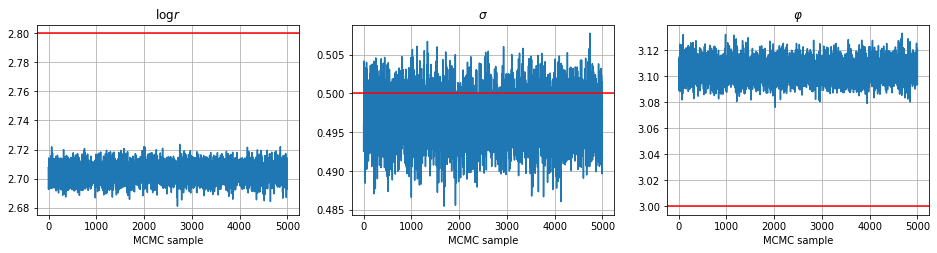

In [25]:
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.subplot(131)
plt.plot(trace_full_mcmc['logr'])
plt.axhline(y=np.log(r), color="r")
plt.xlabel("MCMC sample")
plt.title(r"$\log r$")
plt.grid(True)
plt.subplot(132)
plt.plot(trace_full_mcmc['sigma'])
plt.axhline(y=sigma, color="r")
plt.xlabel("MCMC sample")
plt.title(r"$\sigma$")
plt.grid(True)
plt.subplot(133)
plt.plot(trace_full_mcmc['phi'])
plt.axhline(y=phi, color="r")
plt.xlabel("MCMC sample")
plt.title(r"$\varphi$")
plt.grid(True)

In [26]:
X_ci = np.percentile(trace_full_mcmc['X'], axis=0, q=[2.5,97.5])

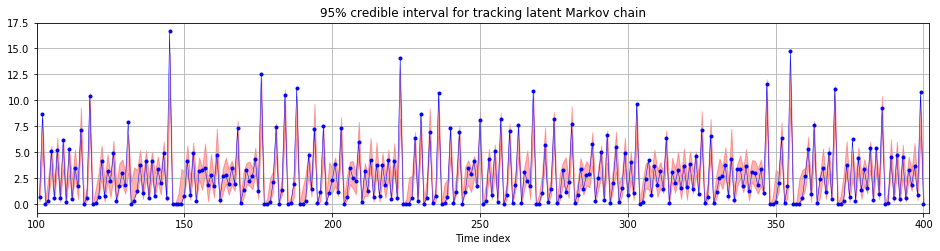

In [27]:
tstart, tend = 100, 400
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(np.arange(tstart+1,tend+1), X[tstart:tend], 'bo-', markersize=3, lw=0.5)
plt.fill_between(np.arange(tstart+1,tend+1),X_ci[0,tstart:tend],X_ci[1,tstart:tend], color='red', alpha=.3)
plt.xlim([tstart,tend+2])
plt.xlabel("Time index")
plt.title("95% credible interval for tracking latent Markov chain")
plt.grid(True)

### Divide-and-conquer

In [ ]:
m = 10
tstarts = np.arange(m).astype(int)
tends = 1 + tstarts
tstarts *= int(T/m)
tends *= int(T/m)

In [ ]:
for i in range(m) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(T=tend-tstart, y=y[tstart:tend], x_0=x_0, power=T/(tend-tstart))
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
    trace = fit.extract()
    file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(i+1)+".pkl", "wb")
    pickle.dump(trace, file)
    file.close()

In [ ]:
for i in range(m) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(T=tend-tstart, y=y[tstart:tend], x_0=x_0, power=1)
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
    trace = fit.extract()
    file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(i+1)+"_nopower.pkl", "wb")
    pickle.dump(trace, file)
    file.close()

In [93]:
for i in range(m) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(T=tend-tstart, y=y[tstart:tend], x_0=x_0, power=2)
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
    trace = fit.extract()
    file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(i+1)+"_power2.pkl", "wb")
    pickle.dump(trace, file)
    file.close()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [94]:
for i in range(m) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(T=tend-tstart, y=y[tstart:tend], x_0=x_0, power=4)
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
    trace = fit.extract()
    file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(i+1)+"_power4.pkl", "wb")
    pickle.dump(trace, file)
    file.close()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [29]:
phi_ci = np.zeros((2,2))
logr_ci = np.zeros((2,2))
sigma_ci = np.zeros((2,2))
for i in range(int(m)) :
    file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(i+1)+".pkl", "rb")
    trace = pickle.load(file)
    phi_ci[0] += np.percentile(trace['phi'],q=[2.5,97.5])/m
    logr_ci[0] += np.percentile(trace['logr'],q=[2.5,97.5])/m
    sigma_ci[0] += np.percentile(trace['sigma'],q=[2.5,97.5])/m
    
    file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(i+1)+"_nopower.pkl", "rb")
    trace = pickle.load(file)
    phi_ci[1] += np.percentile(trace['phi'],q=[2.5,97.5])/m
    logr_ci[1] += np.percentile(trace['logr'],q=[2.5,97.5])/m
    sigma_ci[1] += np.percentile(trace['sigma'],q=[2.5,97.5])/m

In [40]:
phi_ci_full = np.percentile(trace_full_mcmc['phi'],q=[2.5,97.5])
print("phi CI divide-and-conquer         :", phi_ci[0])
print("phi CI divide-and-conquer no power:", phi_ci[1])
print("phi CI MCMC on full data          :", phi_ci_full)
print("             Truth                :", phi)

phi CI divide-and-conquer         : [2.65597145 2.73536353]
phi CI divide-and-conquer no power: [3.05678673 3.15376951]
phi CI MCMC on full data          : [3.08963145 3.12016767]
             Truth                : 3


In [39]:
logr_ci_full = np.percentile(trace_full_mcmc['logr'],q=[2.5,97.5])
print("log r CI divide-and-conquer         :", logr_ci[0])
print("log r CI divide-and-conquer no power:", logr_ci[1])
print("log r CI MCMC on full data          :", logr_ci_full)
print("               Truth                :", np.log(r))

log r CI divide-and-conquer         : [3.06004502 3.1701474 ]
log r CI divide-and-conquer no power: [2.66784296 2.74017852]
log r CI MCMC on full data          : [2.69273649 2.71539429]
               Truth                : 2.8


In [37]:
sigma_ci_full = np.percentile(trace_full_mcmc['sigma'],q=[2.5,97.5])
print("sigma CI divide-and-conquer         :", sigma_ci[0])
print("sigma CI divide-and-conquer no power:", sigma_ci[1])
print("sigma CI MCMC on full data          :", sigma_ci_full)
print("               Truth                :", sigma)

sigma CI divide-and-conquer         : [1.1098631  1.17941487]
sigma CI divide-and-conquer no power: [0.48226604 0.52112699]
sigma CI MCMC on full data          : [0.49066771 0.50293856]
               Truth                : 0.5


In [42]:
print((phi_ci[1,1]-phi_ci[1,0])/(phi_ci_full[1]-phi_ci_full[0]))
print((logr_ci[1,1]-logr_ci[1,0])/(logr_ci_full[1]-logr_ci_full[0]))
print((sigma_ci[1,1]-sigma_ci[1,0])/(sigma_ci_full[1]-sigma_ci_full[0]))

3.1759921838749268
3.1925232374161494
3.1669323997102476


In [43]:
np.sqrt(10)

3.1622776601683795

LinAlgError: singular matrix

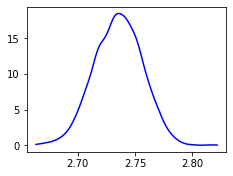

In [6]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplots_adjust(wspace=0.15,hspace=0.25)
for i in range(2) :
    for j in range(5) :
        k = 5*i+j+1
        plt.subplot(2,5,k)
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+".pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['phi']), stop=np.max(trace['phi']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['phi']) (x_vals), color="blue", 
                 label="Subset posterior (likelihood raised to power)")
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_nopower.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['phi']), stop=np.max(trace['phi']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['phi']) (x_vals), color="red", label="Subset posterior (no power)");
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power2.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['phi']), stop=np.max(trace['phi']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['phi']) (x_vals), color="cyan", label="Subset posterior (power = 2)");
        plt.title("Chunk "+str(k))
        plt.grid(True)
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power4.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['phi']), stop=np.max(trace['phi']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['phi']) (x_vals), color="magenta", label="Subset posterior (power = 4)");
        plt.title("Chunk "+str(k))
        plt.grid(True)
        
        x_vals = np.linspace(start=np.min(trace_full['phi']), stop=np.max(trace_full['phi']), num=100)
        plt.plot(x_vals, gaussian_kde(trace_full['phi']) (x_vals), color="green", label="full data posterior");
        if i+j == 0 : 
            plt.legend(ncol=3, bbox_to_anchor=(4.8,1.7), fontsize=14, frameon=False)
plt.suptitle(r"Subset posteriors for $\varphi$", fontsize=16);

LinAlgError: singular matrix

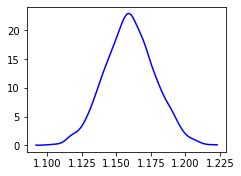

In [7]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplots_adjust(wspace=0.15,hspace=0.25)
for i in range(2) :
    for j in range(5) :
        k = 5*i+j+1
        plt.subplot(2,5,k)
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+".pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['sigma']), stop=np.max(trace['sigma']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['sigma']) (x_vals), color="blue", 
                 label="Subset posterior (likelihood raised to power)")
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_nopower.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['sigma']), stop=np.max(trace['sigma']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['sigma']) (x_vals), color="red", label="Subset posterior (no power)");
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power2.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['sigma']), stop=np.max(trace['sigma']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['sigma']) (x_vals), color="cyan", label="Subset posterior (power = 2)");
        plt.title("Chunk "+str(k))
        plt.grid(True)
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power4.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['sigma']), stop=np.max(trace['sigma']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['sigma']) (x_vals), color="magenta", label="Subset posterior (power = 4)");
        plt.title("Chunk "+str(k))
        plt.grid(True)
        
        x_vals = np.linspace(start=np.min(trace_full['sigma']), stop=np.max(trace_full['sigma']), num=100)
        plt.plot(x_vals, gaussian_kde(trace_full['sigma']) (x_vals), color="green", label="full data posterior");
        if i+j == 0 : 
            plt.legend(ncol=3, bbox_to_anchor=(4.8,1.7), fontsize=14, frameon=False)
plt.suptitle(r"Subset posteriors for $\sigma$", fontsize=16);

KeyError: 'logr'

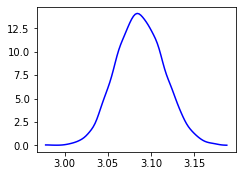

In [8]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplots_adjust(wspace=0.15,hspace=0.25)
for i in range(2) :
    for j in range(5) :
        k = 5*i+j+1
        plt.subplot(2,5,k)
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+".pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['logr']), stop=np.max(trace['logr']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['logr']) (x_vals), color="blue", 
                 label="Subset posterior (likelihood raised to power)")
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_nopower.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['logr']), stop=np.max(trace['logr']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['logr']) (x_vals), color="red", label="Subset posterior (no power)");
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power2.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['logr']), stop=np.max(trace['logr']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['logr']) (x_vals), color="cyan", label="Subset posterior (power = 2)");
        plt.title("Chunk "+str(k))
        plt.grid(True)
        
        file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power4.pkl", "rb")
        trace = pickle.load(file)
        x_vals = np.linspace(start=np.min(trace['logr']), stop=np.max(trace['logr']), num=100)
        plt.plot(x_vals, gaussian_kde(trace['logr']) (x_vals), color="magenta", label="Subset posterior (power = 4)");
        plt.title("Chunk "+str(k))
        plt.grid(True)
        
        x_vals = np.linspace(start=np.min(trace_full['logr']), stop=np.max(trace_full['logr']), num=100)
        plt.plot(x_vals, gaussian_kde(trace_full['logr']) (x_vals), color="green", label="full data posterior");
        if i+j == 0 : 
            plt.legend(ncol=3, bbox_to_anchor=(4.8,1.6), fontsize=14, frameon=False)
plt.suptitle(r"Subset posteriors for $\log r$", fontsize=16);

### Tracking latent trajectory:

In [5]:
m = 10
tstarts = np.arange(m).astype(int)
tends = 1 + tstarts
tstarts *= int(T/m)
tends *= int(T/m)

In [38]:
k = 8
tstart, tend = 500, 600

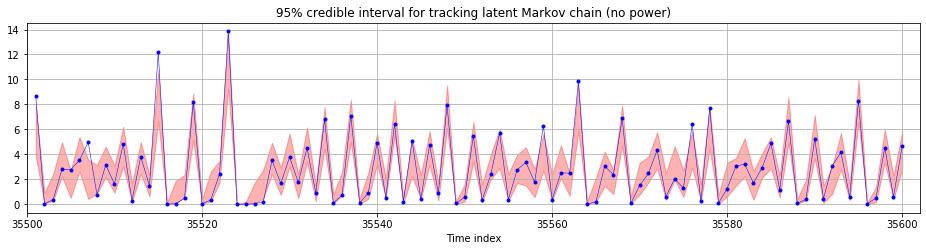

In [39]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_nopower.pkl", "rb")
trace = pickle.load(file)
X_ci = np.percentile(trace['X'], axis=0, q=[2.5,97.5])
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(tstarts[k-1]+np.arange(tstart+1,tend+1), X[tstarts[k-1]+tstart:tstarts[k-1]+tend], 'bo-', markersize=3, lw=0.5)
plt.fill_between(tstarts[k-1]+np.arange(tstart+1,tend+1),X_ci[0,tstart:tend],X_ci[1,tstart:tend], color='red', alpha=.3)
plt.xlim([tstarts[k-1]+tstart,tstarts[k-1]+tend+2])
plt.xlabel("Time index")
plt.title("95% credible interval for tracking latent Markov chain (no power)")
plt.grid(True)

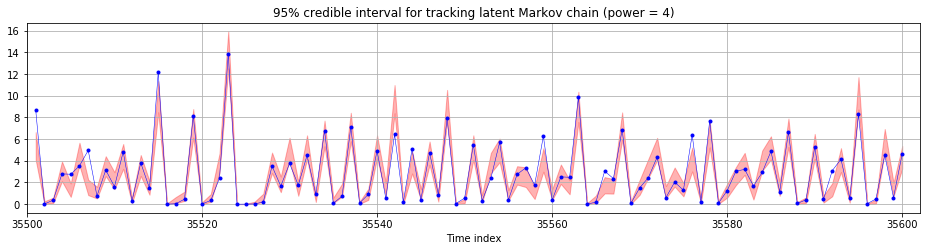

In [40]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power4.pkl", "rb")
trace = pickle.load(file)
X_ci = np.percentile(trace['X'], axis=0, q=[2.5,97.5])
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(tstarts[k-1]+np.arange(tstart+1,tend+1), X[tstarts[k-1]+tstart:tstarts[k-1]+tend], 'bo-', markersize=3, lw=0.5)
plt.fill_between(tstarts[k-1]+np.arange(tstart+1,tend+1),X_ci[0,tstart:tend],X_ci[1,tstart:tend], color='red', alpha=.3)
plt.xlim([tstarts[k-1]+tstart,tstarts[k-1]+tend+2])
plt.xlabel("Time index")
plt.title("95% credible interval for tracking latent Markov chain (power = 4)")
plt.grid(True)

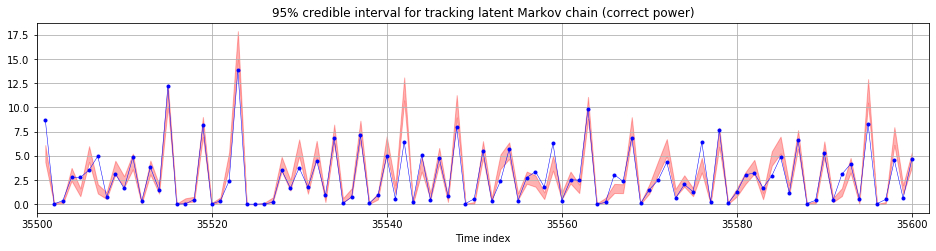

In [41]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+".pkl", "rb")
trace = pickle.load(file)
X_ci = np.percentile(trace['X'], axis=0, q=[2.5,97.5])
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(tstarts[k-1]+np.arange(tstart+1,tend+1), X[tstarts[k-1]+tstart:tstarts[k-1]+tend], 'bo-', markersize=3, lw=0.5)
plt.fill_between(tstarts[k-1]+np.arange(tstart+1,tend+1),X_ci[0,tstart:tend],X_ci[1,tstart:tend], color='red', alpha=.3)
plt.xlim([tstarts[k-1]+tstart,tstarts[k-1]+tend+2])
plt.xlabel("Time index")
plt.title("95% credible interval for tracking latent Markov chain (correct power)")
plt.grid(True)

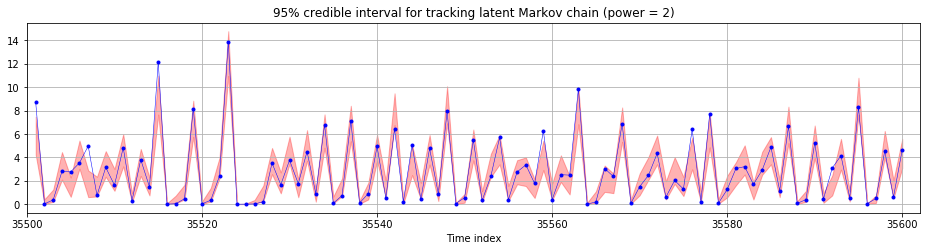

In [42]:
file = open("/xtmp/DC-BATS_data/ricker_HMM/mcmc_wb_chunk"+str(k)+"_power2.pkl", "rb")
trace = pickle.load(file)
X_ci = np.percentile(trace['X'], axis=0, q=[2.5,97.5])
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(tstarts[k-1]+np.arange(tstart+1,tend+1), X[tstarts[k-1]+tstart:tstarts[k-1]+tend], 'bo-', markersize=3, lw=0.5)
plt.fill_between(tstarts[k-1]+np.arange(tstart+1,tend+1),X_ci[0,tstart:tend],X_ci[1,tstart:tend], color='red', alpha=.3)
plt.xlim([tstarts[k-1]+tstart,tstarts[k-1]+tend+2])
plt.xlabel("Time index")
plt.title("95% credible interval for tracking latent Markov chain (power = 2)")
plt.grid(True)